Default settings and imports

In [2]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

Creating the dataset

In [3]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

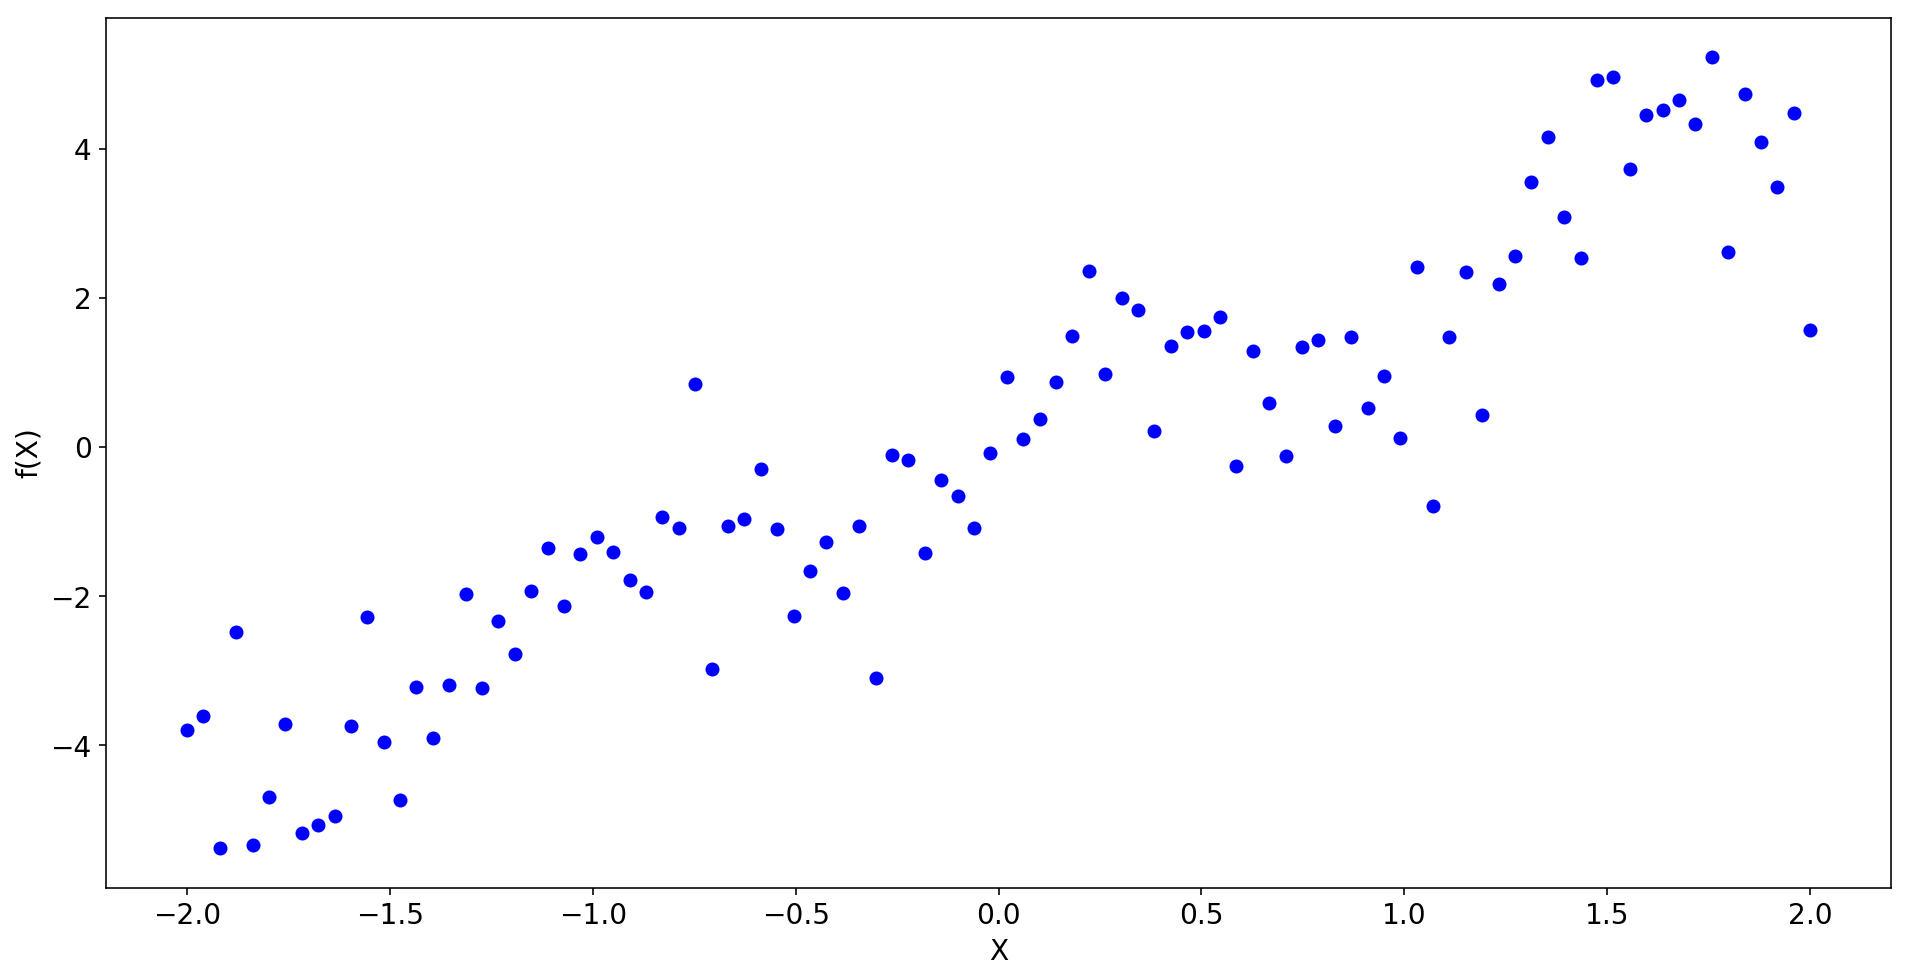

In [4]:
X,y = make_regression()
plt.plot(X, y, 'ob')
plt.xlabel("X")
plt.ylabel("f(X)");

Dataset split into a training and testing set: to avoid possible bias, the samples are splited randomly into two datasets of equal size 

Linear regression:

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import colors as mcolors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

class AnalyzeNeigbours(object):

    def __init__(self, X, y, NeighbourPoints):
        
        self.fits=[]
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
        line = np.linspace(-2, 2, 100).reshape(-1, 1)
        for i in NeighbourPoints:
            rgr = KNeighborsRegressor(n_neighbors=i)
            rgr.fit(X_train, y_train)
            self.fits.append(rgr)    
        
    def PlotDataWithFits(self):
        plt.plot(X_train, y_train, '^b', label='train')
        plt.plot(X_test, y_test, 'ok', label='test')
        plt.xlabel("X")
        plt.ylabel("f(X)");
        colors = list( dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS) )
        
        for i in NeighbourPoints:
            plt.plot(line, self.fits[i-1].predict(line), colors[i*2], label='%i Neigbours' %i) 
        plt.legend(loc='best')
        return 
    
    
    def GetNeigboursMSE(self):
        MSE_train =[]
        MSE_test  =[]  
        for i in NeighbourPoints:
            MSE_train.append( mean_squared_error(y_train, self.fits[i-1].predict(X_train)))
            MSE_test.append( mean_squared_error(y_test, self.fits[i-1].predict(X_test)))
    
        return MSE_train, MSE_test
    
    def __call__(self):
        self.PlotDataWithFits()
        self.GetNeigboursMSE()

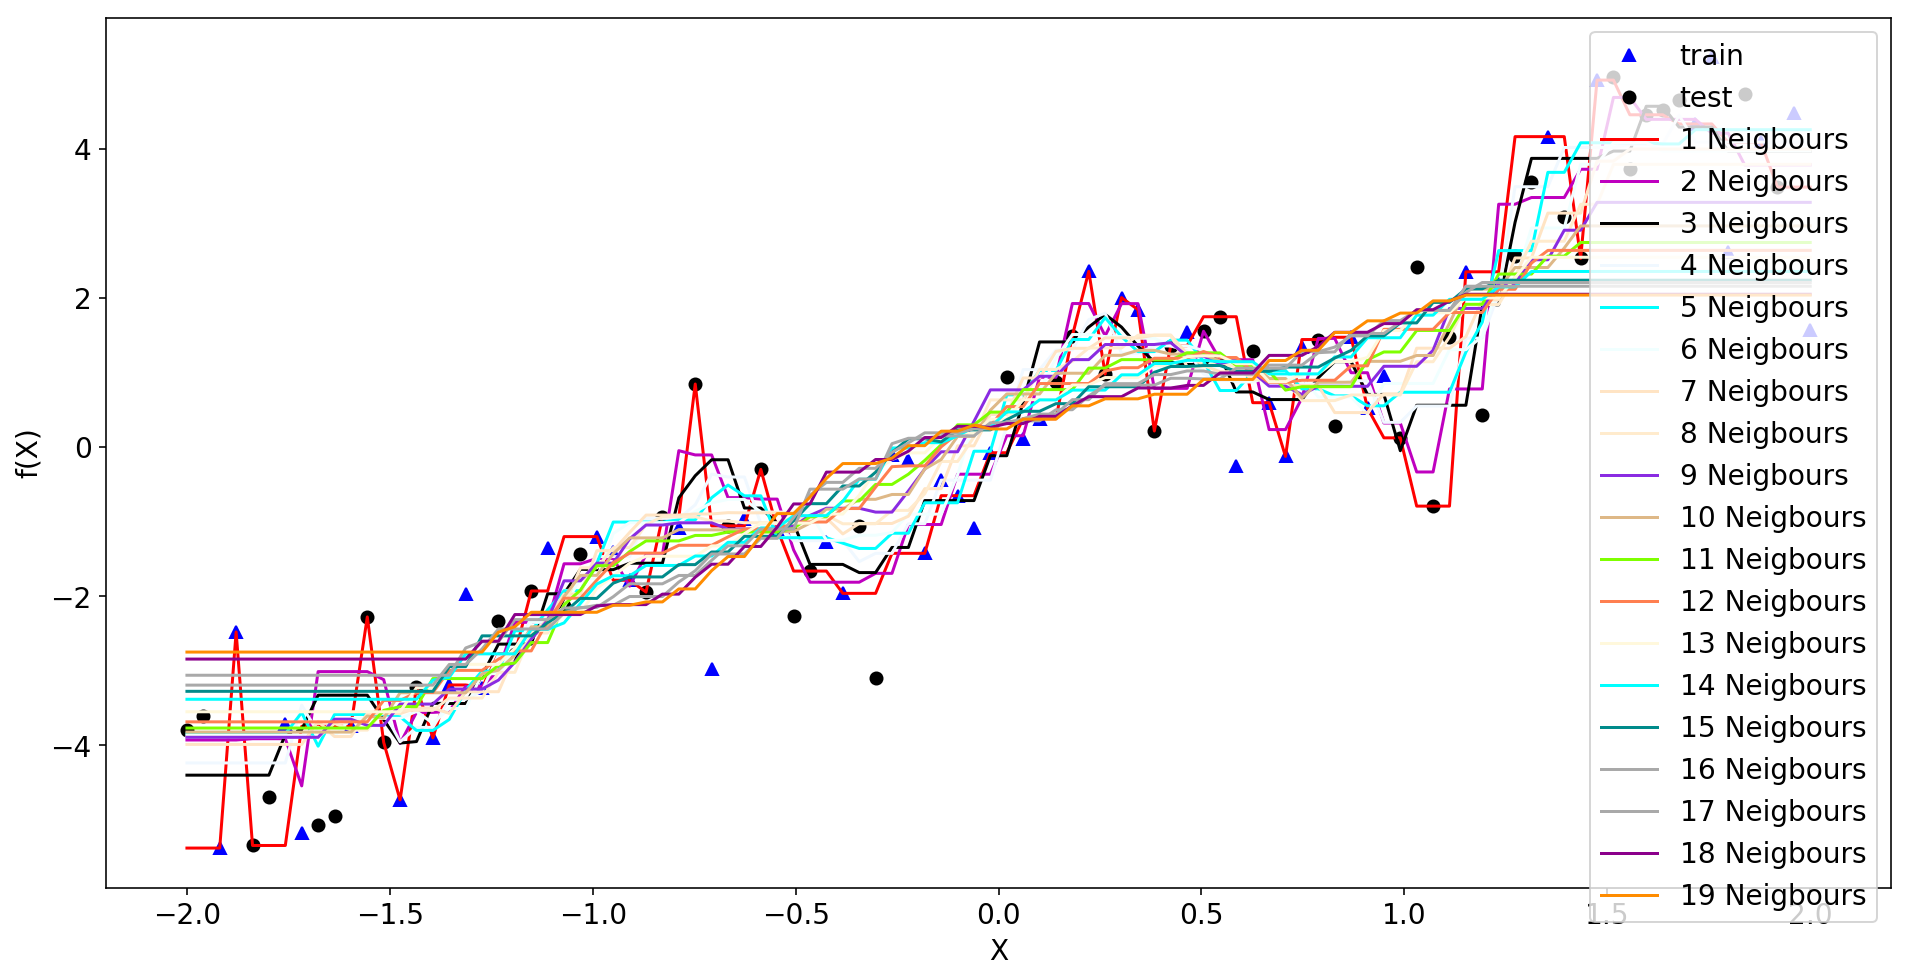

In [101]:
NeighbourPoints = range (1,20)    
AN=AnalyzeNeigbours(X,y,NeighbourPoints)
AN.PlotDataWithFits()

The predictions for training poinst are always better for the lower number of of training poits because the regresor is more sestive to the fine structure of the training sample than for higher number of neigbours and therefore, the predictions for test sample are generally worsen for low number of neigbours. The the figure above sugests that the best performance corresponds to choosing betweeb 6 and 10 yet this is only a first estimate as the calculation of squared errors gives more solid information for selecting the best number of neighbours for this situation. Also, it is observed that with increasing number of neighbours, the complexity of the fit decreases and the resuls looks more linearly. Now, the MSEs are calculated but using statisticaly representative result therefore the entire procedure is repeated multiple times:

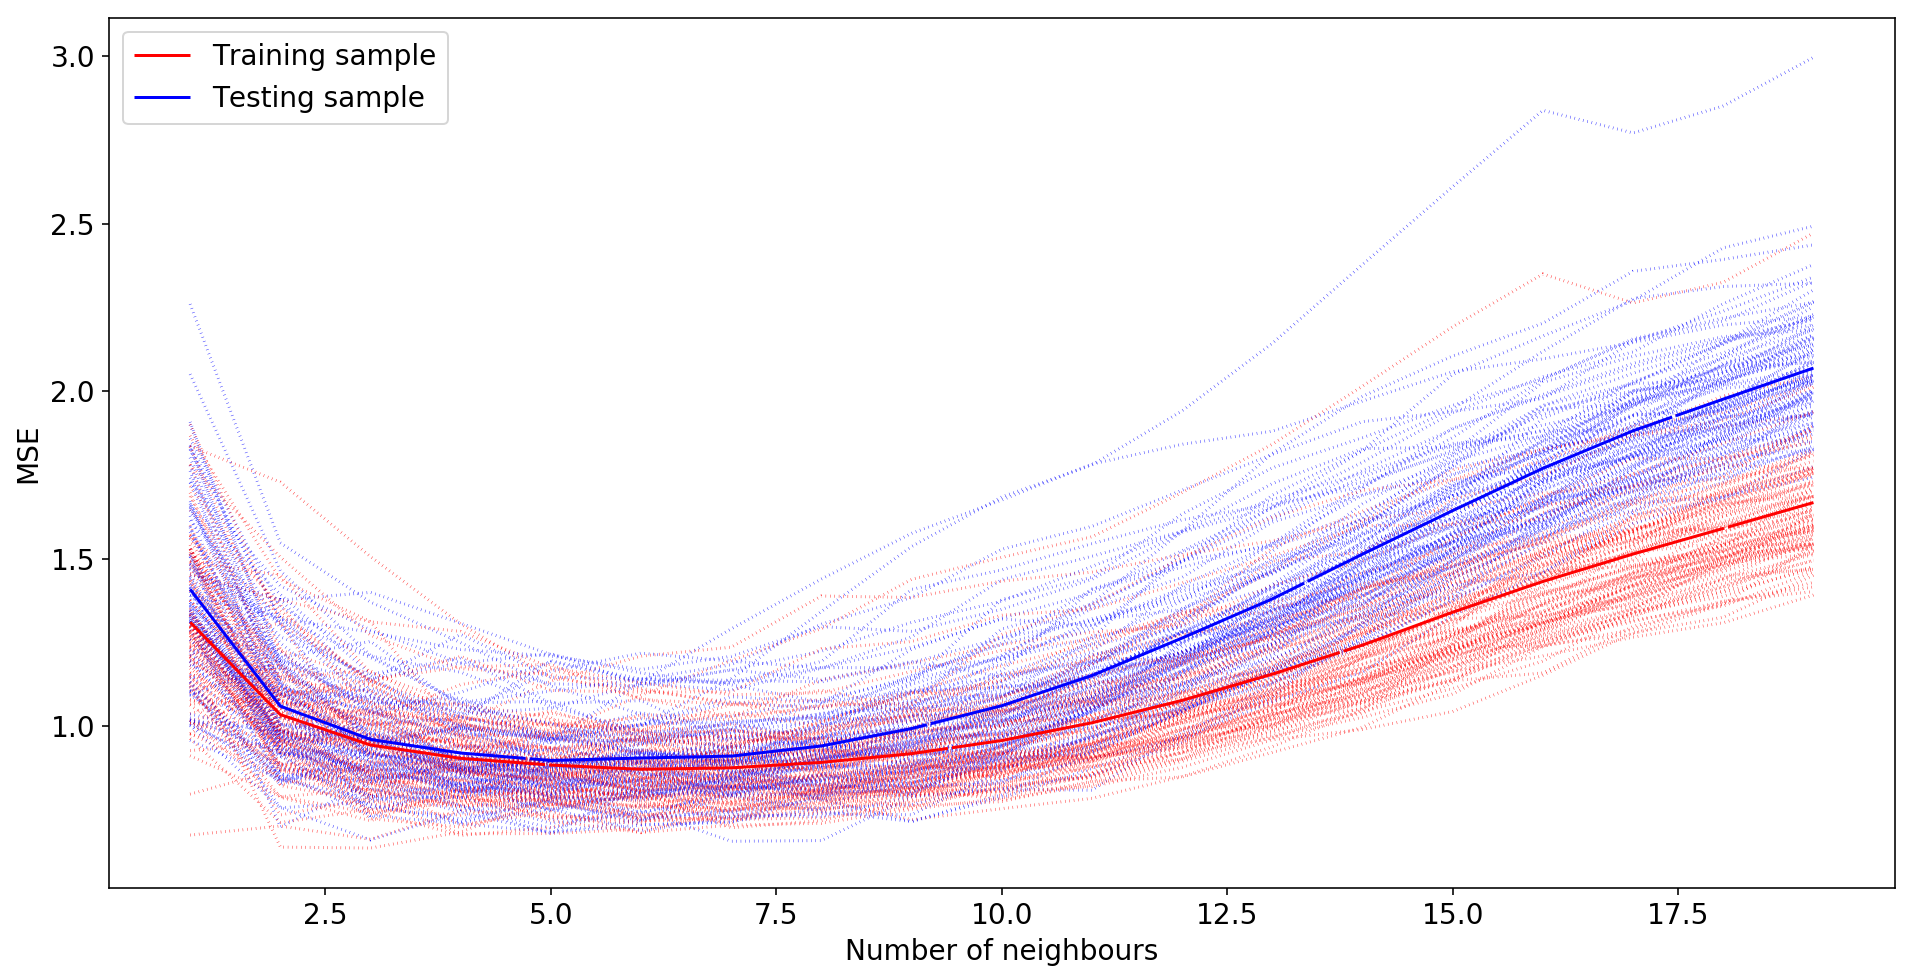

In [104]:

def GetForOneMSE(RandomStateNumber,NeighbourPoints):
    X,y = make_regression(100,0.8,RandomStateNumber)
    AN=AnalyzeNeigbours(X,y,NeighbourPoints)
    train,test = AN.GetNeigboursMSE()
    MSE = [train,test]
    return MSE



MaxNumberOfNeighbours=len(NeighbourPoints)
AverageMSE_train = np.zeros(MaxNumberOfNeighbours)
AverageMSE_test  = np.zeros(MaxNumberOfNeighbours)
NumberOfRepetitions = 100
for i in range (1,NumberOfRepetitions+1) :
    MSE = GetForOneMSE(i, NeighbourPoints)
    plt.plot(NeighbourPoints, MSE[0], 'r--', dashes=(0.1,1)) 
    plt.plot(NeighbourPoints, MSE[1], 'b--', dashes=(0.1,1))
    AverageMSE_train +=  MSE[0] 
    AverageMSE_test  +=  MSE[1]

    
AverageMSE_train/=NumberOfRepetitions
AverageMSE_test/=NumberOfRepetitions

plt.plot(NeighbourPoints, AverageMSE_train, 'r--', dashes=(100,1), label="Training sample") 
plt.plot(NeighbourPoints, AverageMSE_test,  'b--', dashes=(100,1), label="Testing sample" )
plt.legend(loc='best')
plt.xlabel("Number of neighbours")
plt.ylabel("MSE");

The training and testing datasets MSE follow the similar shape, however the training sample always performs better what is indicated with lower error values. Also, the MSE from testing sample increases more rapidely than those from training sample. The figure above suggests that the best choice of number of neigbours is 5 or 6 as for those values the error evaluated on testing sample is minimal in respect to other choices. Plateau signifies the region of optimal performance between insuficient complexity of the system and its incomprehensible complexity. It may be affected by the density of the data poinsts in the examined region as increasing population of points would more constrain the fit.